In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Nuevas Librearias.
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)

In [27]:
df = df.to_numpy()
#Funcion para calcular la media de cada clase
def calcular_media(X,y,clase):
  return np.mean(X[y==clase],axis=0)

#Preprocesamiento de datos Mnist

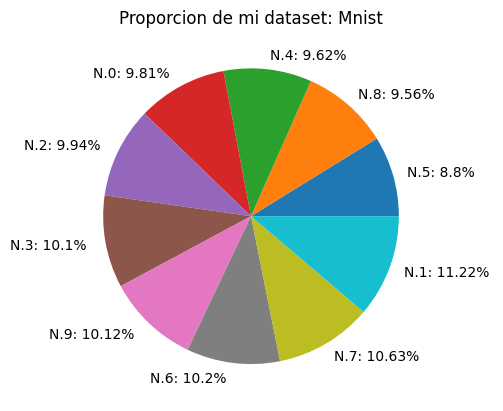

In [5]:
X = df[:,1:]
y = df[:,0]

clases, cantidades = np.unique(y,return_counts=True)
cantidades_ind = np.argsort(cantidades)
total = sum(cantidades)
#print(clases[cantidades_ind])
lab_tex = [f'N.{clases[cantidades_ind[ind]]}: {round(var*100/total,2)}% ' for ind, var in enumerate(cantidades[cantidades_ind])]
plt.pie(cantidades[cantidades_ind], labels=lab_tex)
plt.title('Proporcion de mi dataset: Mnist')
plt.show()

#Visualizacion de un ejemplo del data set

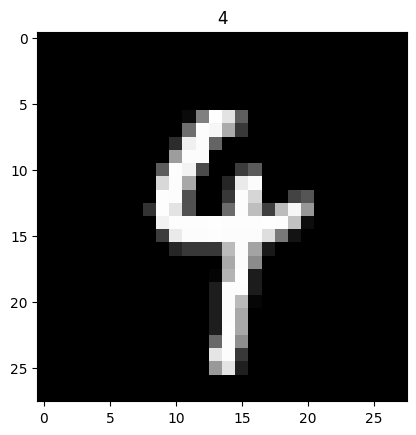

In [20]:
class_select = np.random.choice(X.shape[0])
plt.imshow(X[class_select].reshape((28,28)), cmap='gray')
plt.title(f'{y[class_select]}')
plt.show()

In [23]:
#Creacion de los modelos con sklearn.
pca_model = PCA(n_components=100) # n_components = min (muestras, caracteristicas) para PCA.
lda_model = LinearDiscriminantAnalysis() # n_components = min (clases-1, caracteristicas) para LDA. n_components=min(10-1,768)
knn_model = KNeighborsClassifier(n_neighbors=5) # Solo necesitamos especificar adecuadamente el número de vecinos.

In [24]:
#Entrenamiento de los modelos de reducción dimensiomal
X_pca = pca_model.fit_transform(X)
X_lda = lda_model.fit_transform(X,y)

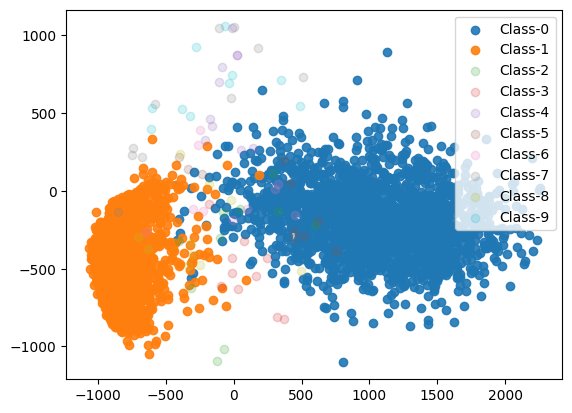

In [44]:
#Grafica de PCA
select = [0,1] #list(range(10)) #[0,1] list(range(10))#
PCA_comp_0,PCA_comp_1 = 0,1

#Valores de cada clase
for num in range(0,10):
  if num not in select:
    plt.scatter(X_pca[y==num,PCA_comp_0][:10],X_pca[y==num,PCA_comp_1][:10], label=f'Class-{num}',alpha=.2)

  elif num in select:
    plt.scatter(X_pca[y==num,PCA_comp_0][:],X_pca[y==num,PCA_comp_1][:], label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

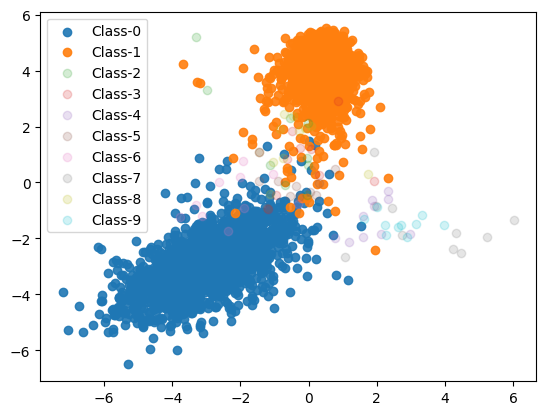

In [46]:
#Grafica de LDA
select = [0,1] #list(range(10)) #[0,1] list(range(10))#
LDA_comp_0,LDA_comp_1 = 0,1

#Valores de cada clase
for num in range(0,10):
  if num not in select:
    plt.scatter(X_lda[y==num,PCA_comp_0][:10],X_lda[y==num,PCA_comp_1][:10], label=f'Class-{num}',alpha=.2)

  elif num in select:
    plt.scatter(X_lda[y==num,PCA_comp_0][:],X_lda[y==num,PCA_comp_1][:], label=f'Class-{num}',alpha=.9)
#Legends
plt.legend()
plt.show()

In [55]:
print(classification_report(y, lda_model.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1962
           1       0.87      0.96      0.92      2243
           2       0.92      0.82      0.87      1989
           3       0.87      0.86      0.86      2021
           4       0.86      0.90      0.88      1924
           5       0.86      0.83      0.84      1761
           6       0.94      0.93      0.93      2039
           7       0.93      0.85      0.89      2126
           8       0.81      0.82      0.81      1912
           9       0.80      0.86      0.83      2023

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [56]:
X_Knn = knn_model.fit(X,y)

In [57]:
print(classification_report(y, knn_model.predict(X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1962
           1       0.95      1.00      0.97      2243
           2       0.99      0.96      0.97      1989
           3       0.98      0.97      0.97      2021
           4       0.98      0.97      0.98      1924
           5       0.97      0.98      0.98      1761
           6       0.99      0.99      0.99      2039
           7       0.97      0.97      0.97      2126
           8       0.99      0.94      0.97      1912
           9       0.96      0.97      0.96      2023

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [78]:
n_componentes_selec = 15
X_Knn_PCA_model = knn_model.fit(X_pca[:,:n_componentes_selec],y)

In [79]:
print(classification_report(y, X_Knn_PCA_model.predict(X_pca[:,:n_componentes_selec])))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1962
           1       0.98      0.99      0.98      2243
           2       0.97      0.97      0.97      1989
           3       0.97      0.94      0.95      2021
           4       0.97      0.96      0.96      1924
           5       0.96      0.96      0.96      1761
           6       0.97      0.99      0.98      2039
           7       0.97      0.97      0.97      2126
           8       0.96      0.96      0.96      1912
           9       0.94      0.95      0.94      2023

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

